note that this notebook can be viewed as a slideshow triggered by: File -> Download as -> Reveal.js slides (.html)

## PySDM tutorial: Coalescence
### authors: see [github.com/atmos-cloud-sim-uj](https://github.com/atmos-cloud-sim-uj/PySDM/graphs/contributors)
### copyright: Jagiellonian University
#### tutorial licence: CC-BY

### Smoluchowski coagulation equation

$\begin{eqnarray}
\frac{d}{dt}{c_i} = \frac{1}{2} \sum\limits_{j=1}^{i-1} a_{j, i-j} c_j c_{i-j} - \sum\limits_{j=1}^{\infty} a_{j, i} c_j c_i
\end{eqnarray}$

where $a_{i,j}$ is a so-called kernel defining rate of collisions and $c_i$ is the number concentration (in a volume of air) of the particles with volume $i \cdot \Delta v$ where $\Delta v$ is a droplet volume increment.

Note that $c_i$ will correspond to super-droplet multiplicity $n^{[i]}$ (in a unit volume of air) if:
- $v^{[i]} = i \cdot \Delta v$,
- $v^{[i]}$ does not change in time.

### Smoluchowski equation: example

In [10]:
def smoluchowski(c, a, dt):
    dc = [0]*len(c)
    for i in range(len(c)):
        dc[i] = (
            1/2 * sum([a[j][i-j-1] * c[j] * c[i-j-1] for j in range(i)]) 
                - sum([a[j][i]   * c[j] * c[i]   for j in range(len(c))])
        )
    for i in range(len(c)):
        c[i] += dc[i] * dt 

In [11]:
import matplotlib.pyplot as plt
fig = None

def plot(c, column):
    global fig, axs
    if fig is None:
        fig, axs = plt.subplots(1, 2, figsize=(10,3), sharey=True)
    axs[column].bar(range(1, len(c)+1), c)

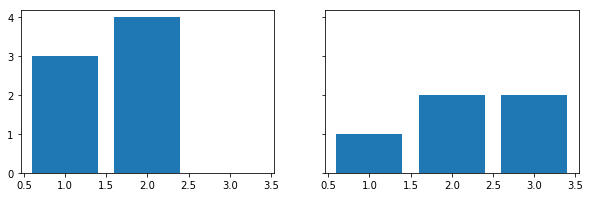

In [12]:
c = [3,4,0]
a = [[0,   1/6, 0], 
     [1/6, 0,   0], 
     [0,   0,   0]]

plot(c, 0)
smoluchowski(c, a, dt=1)
plot(c, 1)

### Smoluchowski equation: challenges

- lack of analytical solutions for physical kernels
- challenges with numerical solutions:
  - distinguishing particles of same $v^{[i]}$ but different attributes (e.g., nucleus size) 
  - $v^{[i]} : [0, T] \rightarrow \mathcal{R}$ (due to processes other than coalescence)
  - increasing number of super-particles needed to represent outcomes of collisions

### Monte-Carlo alternative to Smoluchowski eq.

| ... | ... | Shima et al. 2009: |
|-----|-----|--------------------|
|pairs| considering all (i,j) pairs | consider a random selection of N/2 non-overlapping pairs and upscale the probability accordingly (i.e., by the n^2/2 to n/2 ratio) |
|comp. complexity | O(n^2) | O(n)|
|...|colliding a fraction of n_i, n_j in each dt | collide all of min(n_i, n_j) once per number of timesteps (all or nothing) |
|...|every step |trigger collision event by comparing probablity with a random number|

### The super-droplet method 
![Shima_et_al_2009_Fig_1](pics/Shima_et_al_2009_Fig_1.png)

See demo